# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [1]:
import numpy as np
from numpy import load
from numpy import asarray
from numpy import save
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage.feature
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [2]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

#image_index = 1 # pick a specific image
#image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


# Shuffle data to ensure not ordered

In [3]:
images = shuffle(images, random_state=0)
label_fine, label_coarse = shuffle(label_fine, label_coarse, random_state=0) #make sure the samples are not ordered


test_images = shuffle(test_images, random_state=0)
test_label_fine, test_label_coarse = shuffle(test_label_fine, test_label_coarse, random_state=0)

# CNN

In [ ]:
#images_reshaped = np.transpose(images, (3, 0, 1, 2))[:, :, :, -1]
#images_reshaped = np.expand_dims(images_reshaped, axis=3)
#
#print(images_reshaped.shape)
#print(images.shape)

In [ ]:
#test_images_reshaped = np.transpose(test_images, (3, 0, 1, 2))[:, :, :, -1]
#test_images_reshaped = np.expand_dims(test_images_reshaped, axis=3)

#print(test_images_reshaped.shape)

# Normalise the data, for each image do a hog, add how to array, train images

In [10]:
try:
    train_images_normalised = load('hog_array_train.npy')
    print(train_images_normalised.shape)
except FileNotFoundError: 
    
    train_images_normalised = []
    
    for image_index in range(0, images.shape[3]):
        print(image_index, images.shape[3])
        image = images[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
        train_images_normalised.append(hog_image)
        
    train_images_output = np.array(train_images_normalised)
    data = asarray(train_images_output)
        # save to npy file
    save('hog_array_train.npy', data)
    

(50000, 32, 32)


normalise test data

In [9]:
try:
    test_images_normalised = load('hog_array_test.npy')
    print(test_images_normalised.shape)
    
except: 
    test_images_normalised = []
    for image_index in range(0, test_images.shape[3]):
        print(image_index, test_images.shape[3])
        image = test_images[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
        test_images_normalised.append(hog_image)

    train_images_output = np.array(test_images_normalised)
    data = asarray(train_images_output)
    save('hog_array_test.npy', data)

(10000, 32, 32)


### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(train_images_normalised.shape)
print(test_images_normalised.shape)

(50000, 32, 32)
(10000, 32, 32)


Check the Data cardinality

In [ ]:
# print(train_images_normalised.shape)
# print(test_images_normalised.shape)

# #train_images_normalised = np.array(train_images_normalised).reshape(50000, -1, 32, 32)
# #test_images_normalised = np.array(test_images_normalised).reshape(10000, -1, 32, 32)

# #train_images_normalised = train_images_normalised[:, 0, :, :]
# test_images_normalised = test_images_normalised[:, 0, :, :]

# train_images_normalised = np.transpose(train_images_normalised, (1, 2, 0))
# test_images_normalised = np.transpose(test_images_normalised, (1, 2, 0))

# print(train_images_normalised.shape)
# print(test_images_normalised.shape)


# print(label_fine.shape)
# print(test_label_fine.shape)

In [18]:
#check number of unique  labels in coarse dtaaset
#number of labels

output_num_fine = (np.unique(label_fine).shape[0])
print(output_num_fine)

output_num_coarse = (np.unique(label_coarse).shape[0])
print(output_num_coarse)

print(train_images_normalised.shape)
print(label_coarse.shape)

100
20
(50000, 32, 32)
(50000,)


In [30]:
train_images_reshaped = train_images_normalised.reshape(50000, 32, 32, 1)
test_images_reshaped = test_images_normalised.reshape(10000, 32, 32, 1)

In [31]:
print(train_images_reshaped.shape)
print(test_images_reshaped.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [23]:
xTrn_split, xTst_split, yTrn_split, yTst_split = train_test_split(train_images_reshaped, label_coarse, test_size=0.2)

In [25]:
model.add(tf.keras.layers.Flatten()) #dense layers can oinly have 1d so flattern araray to one dimension
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_num_coarse, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xTrn_split, yTrn_split, epochs=10, 
                    validation_data=(xTst_split, yTst_split))

Epoch 1/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.9964 - accuracy: 0.0499 - val_loss: 2.9963 - val_accuracy: 0.0478
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9962 - accuracy: 0.0492 - val_loss: 2.9961 - val_accuracy: 0.0502
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9958 - accuracy: 0.0470 - val_loss: 2.9961 - val_accuracy: 0.0463
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9960 - accuracy: 0.0495 - val_loss: 2.9961 - val_accuracy: 0.0473
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9958 - accuracy: 0.0490 - val_loss: 2.9961 - val_accuracy: 0.0473
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9960 - accuracy: 0.0496 - val_loss: 2.9962 - val_accuracy: 0.0473
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9960 - accuracy: 0.0480 - val_loss: 2.9963 - val_accuracy

###  Predict labels for the testing set and check accuracy

In [ ]:
print(model.predict(test_x))

### Plot models traing curves 

1563/1563 - 2s - loss: 2.9958 - accuracy: 0.0500
0.05000000074505806


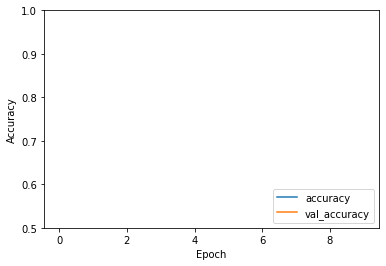

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_images_reshaped,  label_coarse, verbose=2)

print(test_acc)

In [33]:
score = model.evaluate(test_images_reshaped, test_label_coarse, verbose=0)
print(score)

[2.9957950115203857, 0.05000000074505806]
